In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# custom packages
from ratsimulator import Agent
from ratsimulator.Environment import Rectangle

import sys
sys.path.append("../../src") if "../../src" not in sys.path else None # avoid adding multiple relave paths to sys.path

from Brain_numpy import Brain

In [3]:
boxsize=(2.2, 2.2)
origo=(0,0)
soft_boundary=0.2

In [4]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
npcs=4096
sigma=0.12
brain = Brain(env, npcs, sigma)
board = env.get_board(res=(32,32))
# avoid_walls = env.avoid_walls
# env.add_wall(name="free_wall1", bias=np.array([0.401,0.403]),slope=np.array([0.8,0.8]),t=[0,1])

Singular matrix
Singular matrix


# Single cell response

(32, 32, 4096)


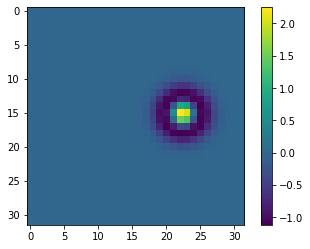

In [5]:
# VECTORIZED and succinct brain response calculations
br = brain(board,lateral_inhibition=False)
print(br.shape)
plt.imshow(br[...,0])
plt.colorbar()

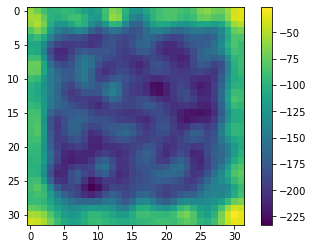

In [6]:
plt.imshow(np.sum(br,axis=-1))
plt.colorbar()

# Lateral inhibition? -> "Single cell response, but with global activity regularization"

Summed place-cell activity is 1 for each spatial location:  1.0 True
Activity = 2.1112581410061572e-11, in middle of the board for cell_nr = 8


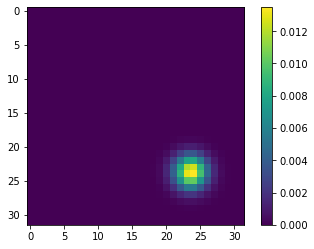

In [7]:
cell_nr = 8
activity_model = brain.norm_response
br = brain(board,lateral_inhibition=True, activity_model=activity_model)
plt.imshow(br[...,cell_nr])
plt.colorbar()

print("Summed place-cell activity is 1 for each spatial location: ", np.mean(np.sum(br,axis=-1)), (np.sum(br) == np.prod(br.shape[:-1])))
print("Activity = {}, in middle of the board for cell_nr = {}".format(br[int(board.shape[0]/2),int(board.shape[1]/2),cell_nr],cell_nr))

# Decoding error going from place-cell basis to Euclidean basis

In [8]:
diff = np.sqrt(np.sum((brain.to_euclid(br,k=3) - board)**2,axis=-1))
plt.imshow(diff)
plt.colorbar()

TypeError: unsupported operand type(s) for -: 'type' and 'float'

# Sorschers place-cell activity

Activity = 1.1406967591734437e-07, in middle of the board for cell_nr = 8


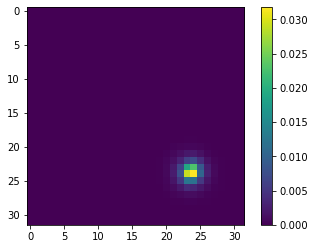

In [9]:
br = brain.softmax_response(board,DoG=True)
plt.imshow(br[...,cell_nr])
plt.colorbar()
print("Activity = {}, in middle of the board for cell_nr = {}".format(br[int(board.shape[0]/2),int(board.shape[1]/2),cell_nr],cell_nr))

# Non-vectorized plotting (Sanity check)

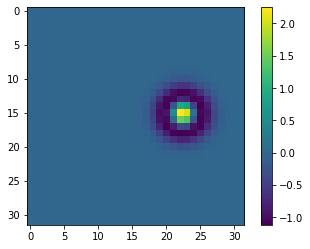

In [11]:
board = env.get_board()
exmp_pc = brain.pcs[0]
Z = np.zeros(board.shape[:-1])
for i in range(board.shape[0]):
    for j in range(board.shape[1]):
        #print(board[i,j],exmp_pc)
        d = brain.d_pcc(board[i,j],exmp_pc)
        tmp = brain.ricker_response(d) # or norm_response
        #print(tmp)
        Z[i,j] = tmp

plt.imshow(Z)
plt.colorbar()

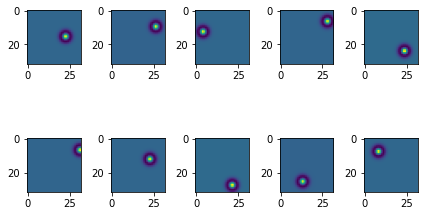

In [12]:
ncols,nrows = 5,2
fig,axs=plt.subplots(ncols=ncols,nrows=nrows)

for cols in range(ncols):
    for rows in range(nrows):
        Z = np.zeros(board.shape[:-1])
        for i in range(board.shape[0]):
            for j in range(board.shape[1]):
                tmp = brain.d_pcc(board[i,j],brain.pcs[cols*nrows+rows])
                tmp = brain.ricker_response(tmp)
                Z[i,j] = tmp
            
        
        axs[rows,cols].imshow(Z)
        
plt.tight_layout()